In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scienceplots
import pandas as pd

In [3]:
plt.style.use(['science','notebook','grid'])

In [4]:
df=pd.read_csv('gonies.csv',sep=';')
df

,θ,N1,N2,N12,N1',N2'
0,180,14403,17660,1618,14457,18061
1,150,14179,19082,1667,14541,19618
2,120,14369,16252,1305,14393,16443
3,90,14623,14462,1183,14475,14804


In [5]:
N1_mean=(df['N1']+df["N1'"])/2
N2_mean=(df['N2']+df["N2'"])/2

In [6]:
R1=N1_mean/10
R2=N2_mean/10
R12=df['N12']/1000

In [7]:
Racc=40*(10**(-9))*R1*R2

In [8]:
W=R12-Racc

In [9]:
G=W/W[3]

In [10]:
x=np.linspace(90,180,100)
Wth=1+0.125*(np.cos(x*np.pi/180)**2)+0.0417*(np.cos(x*np.pi/180)**4)

In [11]:
dR12=R12*np.sqrt(1/N1_mean+1/N2_mean)
dRacc=Racc*np.sqrt(1/N1_mean+1/N2_mean)
dW=np.sqrt(dR12**2+dRacc**2)
dG=G*np.sqrt((dW/W)**2+(dW[3]/W[3])**2)

<ErrorbarContainer object of 3 artists>

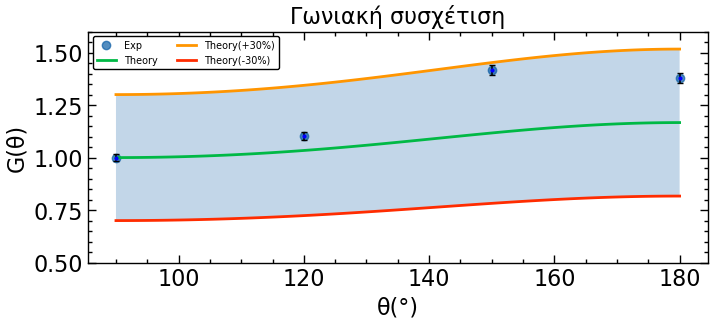

In [12]:
plt.figure(figsize=(8,3))
plt.plot(df['θ'],G,'o',label='Exp',alpha=0.7)
plt.plot(x,Wth,label='Theory')
plt.plot(x,Wth+Wth*0.3,label='Theory(+30%)')
plt.plot(x,Wth-Wth*0.3,label='Theory(-30%)')
plt.fill_between(x,Wth+Wth*0.3,Wth-Wth*0.3,alpha=0.25)
plt.ylim(0.5,1.6)

plt.legend(loc='upper left',ncol=2,fontsize=7,edgecolor='black')
plt.xlabel('θ(°)')
plt.ylabel('G(θ)')
plt.title('Γωνιακή συσχέτιση')
plt.grid(False)
plt.errorbar(df['θ'],G,yerr=dG,fmt='o',color='blue',ms=2,ecolor='black',elinewidth=1.1,capsize=2)

In [13]:
print(G,W,R12,Racc)

0    1.379898
1    1.417193
2    1.103039
3    1.000000
dtype: float64 0    1.514909
1    1.555854
2    1.210963
3    1.097842
dtype: float64 0    1.618
1    1.667
2    1.305
3    1.183
Name: N12, dtype: float64 0    0.103091
1    0.111146
2    0.094037
3    0.085158
dtype: float64


In [14]:
print(dG,dW,dR12,dRacc)

0    0.024039
1    0.024541
2    0.019501
3    0.017888
dtype: float64 0    0.018147
1    0.018402
2    0.014958
3    0.013886
dtype: float64 0    0.018111
1    0.018361
2    0.014920
3    0.013850
dtype: float64 0    0.001154
1    0.001224
2    0.001075
3    0.000997
dtype: float64
